# Ensemble
- 단일 machine learning보다 좋은 성능 (속도 및 정확도)
- 다수의 machine learning을 종합하여 최종 모델로 사용
- 다수의 모델 구축 -> 학습 데이터 분할 / 재사용 필요
- 단일 모델의 취합 방법, 연결 방법에 따라 종류를 구분
  - Bagging
  - Boosting

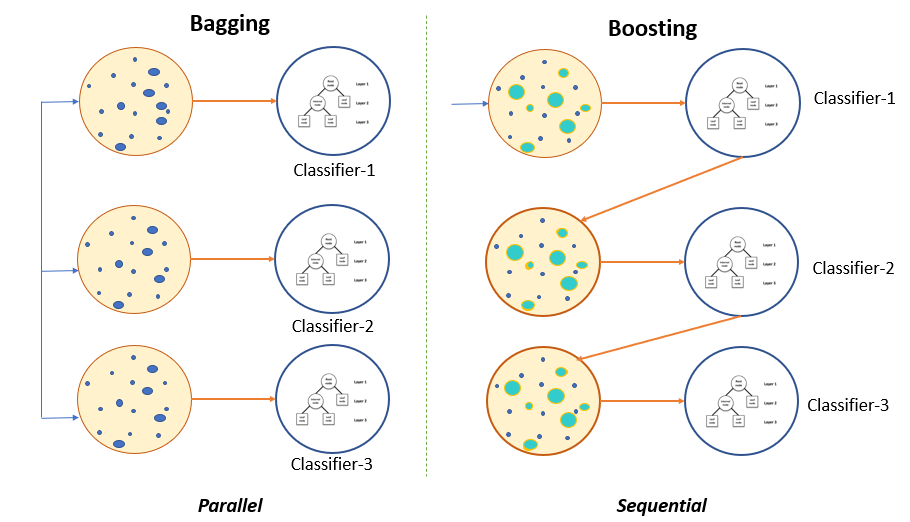

Reference:https://www.pluralsight.com/guides/ensemble-methods:-bagging-versus-boosting

# Bootstrapping
- Training data로부터 n개의 training datasets 구성
- Random sampling **with replacement**
  - 동일 data, 동일 dataset에 중복을 허용



# Bootstrap Aggregation (Bagging)
- Bootstrap 적용하여 구성한 모델의 취합
- Overfit 회피
- Weak (정확도 낮은) 모델 여러개 개발 -> 취합 (정확도 향상)
- 대표적으로 decision tree를 사용하여 Random forest를 만든다.

#Variance Vs. Bias
- Overfit: High varance, low bias
- Underfit: High bias, low variance
- Variance: 예측값의 범위
- Bias: 예측 / 실제 차이

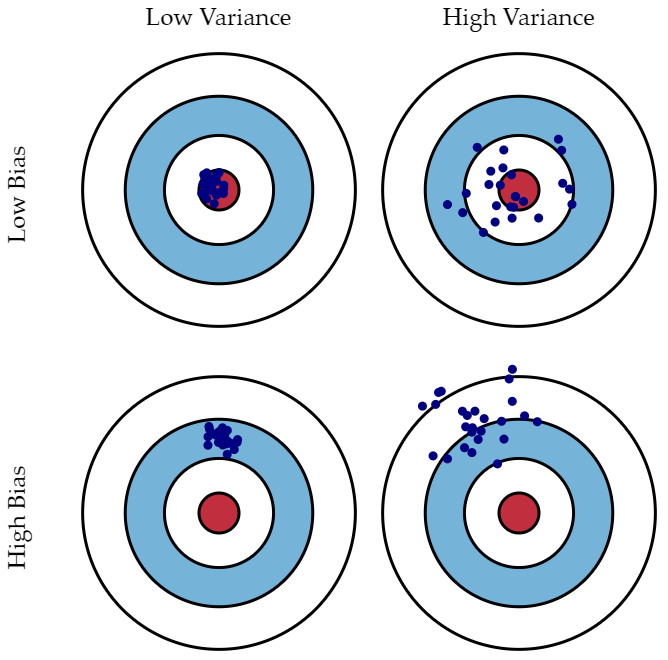

Reference: https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-12-%ED%8E%B8%ED%96%A5Bias%EC%99%80-%EB%B6%84%EC%82%B0Variance-Trade-off

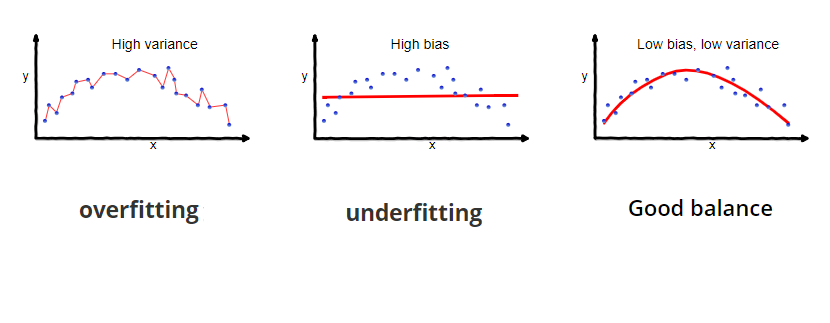

Reference: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

# Total Error
- 최적의 모델을 만들기 위해서는 low variance, low bias를 가진 model을 만들어야 한다.
- 하지만, 알고리즘의 complexity가 증가할수록 bias는 감소하지만, variance는 증가한다.
- 따라서 최적의 위치를 찾아야 한다.

$Total Error = Bias^2 + Variance + irreducible Error$

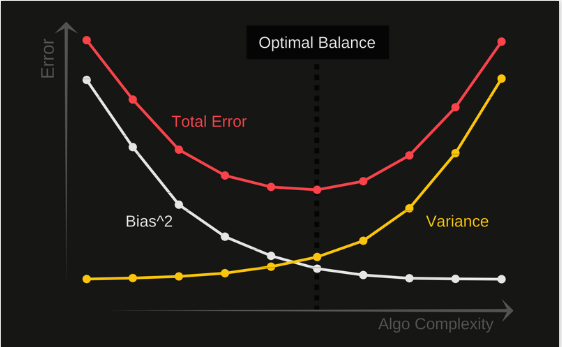

Reference: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

# Boosting
- 다수의 training dataset 구성 **without replacement**
- 순차적 적용
  - 모델 1 개발, 개발 결과를 모델 2 개발의 입력값으로 활용
  - 정확도가 낮은 feature에 대해 가중치 증가
  - 증가된 가중치 -> 적극적인 학습유도
    (AdaBoost)


# Voting
- 개별 모델의 예측값을 기초로 'vote'실시 $→$ 최종 예측값 결정
- 개별 모델 / 예측값 별 다른 가중치 사용
  - Score값이 높은 모델의 투표값을 더 신뢰
  

# Stacking
- 개별 모델의 예측값 축적
- 최종 적용 모델의 입력값을 적용

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

# 단일 KNN

In [6]:
kn = KNeighborsClassifier().fit(X_train, y_train)
kn.score(X_test, y_test)

0.9736842105263158

# Bagging
- Parameter
  - base_estimator: 각 training datasets에 적용할 algorithm (default = DecisionTreeClassifier)
  - n_estimators: training datsets의 수 (default = 10)
  - max_samples: 각 training dataset이 가지는 최대 samples의 수 (1보다 작을 경우 비율로 판단, 1보다 클 경우 숫자로 판단)
  - max_features: 각 training dataset이 가지는 features의 수 (1보다 작을 경우 비율로 판단, 1보다 클 경우 숫자로 판단)
  - n_jobs: 병렬처리 작업 수 (최대 CPU core의 수만큼 가능) -> 속도 향상

In [7]:
bag = BaggingClassifier(base_estimator = KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)
bag.fit(X_train, y_train)
bag.score(X_test, y_test)

0.9736842105263158

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.score(X_test, y_test)

0.9473684210526315

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 5).fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.9736842105263158


In [9]:
bag2 = BaggingClassifier(max_samples = 0.5, max_features = 0.5)
bag2.fit(X_train, y_train)
print(bag2.score(X_test, y_test))

0.9736842105263158


# Adaboost

In [10]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators = 10).fit(X_train, y_train)
print(ad.score(X_test, y_test))

0.9736842105263158


# K-Fold Cross validation
- cv: 분할 수

In [12]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators = 5)
scores = cross_val_score(ad, X, y, cv = 10)
scores.mean()

0.9533333333333334

# Voting
- https://scikit-learn.org/stable/modules/ensemble.html

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


# 활용 예제
- Penguin data 사용
1. K-Means clustering
  - Body_mass, flipper_length
2. Ensemble
  - DecisionTree, LogisticRegression, Ensemble-Bagging(GaussianNB)
  - Voting(RandomForest, LogisticRegression)
    - Soft, RandomForest:LogisticRegression = 1:2
  - Body_mass, bill_length, bill_depth -> species

In [13]:
penguins = sns.load_dataset("penguins")
penguins.dropna(inplace = True)   # Nan removal
species_code = dict(zip(penguins['species'].astype('category').cat.codes, penguins['species']))
island_code = dict(zip(penguins['island'].astype('category').cat.codes, penguins['island']))
sex_code = dict(zip(penguins['sex'].astype('category').cat.codes, penguins['sex']))
print(sex_code)
print(species_code)
print(island_code)
penguins['sex'] = penguins['sex'].astype('category').cat.codes
penguins['species'] = penguins['species'].astype('category').cat.codes
penguins['island'] = penguins['island'].astype('category').cat.codes
print(penguins)

{1: 'Male', 0: 'Female'}
{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}
{2: 'Torgersen', 0: 'Biscoe', 1: 'Dream'}
     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2            39.1           18.7              181.0   
1          0       2            39.5           17.4              186.0   
2          0       2            40.3           18.0              195.0   
4          0       2            36.7           19.3              193.0   
5          0       2            39.3           20.6              190.0   
..       ...     ...             ...            ...                ...   
338        2       0            47.2           13.7              214.0   
340        2       0            46.8           14.3              215.0   
341        2       0            50.4           15.7              222.0   
342        2       0            45.2           14.8              212.0   
343        2       0            49.9           16.1              213.0   

 

# 상관관계 확인

[Text(0.5, 0, 'species'),
 Text(1.5, 0, 'island'),
 Text(2.5, 0, 'bill_length_mm'),
 Text(3.5, 0, 'bill_depth_mm'),
 Text(4.5, 0, 'flipper_length_mm'),
 Text(5.5, 0, 'body_mass_g'),
 Text(6.5, 0, 'sex')]

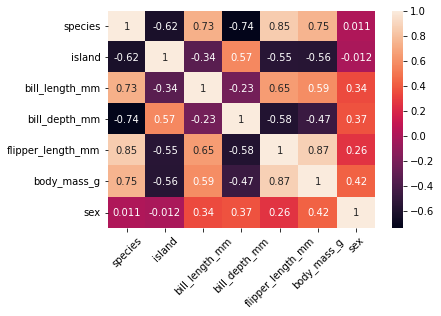

In [14]:
heat_map = sns.heatmap(penguins.corr(method = 'pearson'), annot = True)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation = 45)

# 1. K-Means Clustering
- Body_mass, flipper_length를 이용하여 clustering
- Cluster의 수: 2
- 성별로 군집화가 목적

# Body_mass, flipper_length 관계 시각화

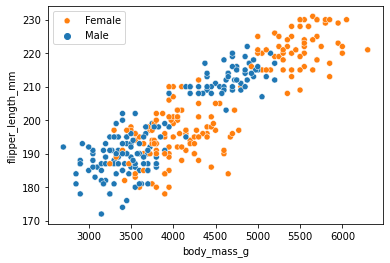

In [18]:
sns.scatterplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm', hue = 'sex')
plt.legend(['Female', 'Male'])

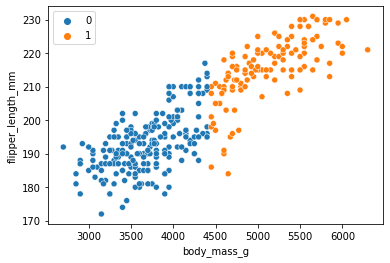

In [20]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import homogeneity_completeness_v_measure

X = penguins[['flipper_length_mm', 'body_mass_g']]
km = MiniBatchKMeans(n_clusters = 2).fit(X)
sns.scatterplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm', hue = km.labels_)

# 2. Ensemble
  - 목적: 
    - Body_mass, bill_length, bill_depth으로 species 예측 모델 만들기
  - 사용 algorithms:
    - DecisionTree, LogisticRegression, Ensemble-Bagging(GaussianNB)
    - Voting(RandomForest, LogisticRegression)
      - Soft, RandomForest:LogisticRegression = 1:2

# Training, Testing dataset 분리

In [21]:
X = penguins[['body_mass_g', 'bill_length_mm', 'bill_depth_mm']]
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

# DecisionTree

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv = 5)
print('Single Decision Tree (5-fold cross validation) Accuracy: ', scores.mean())

dt.fit(X_train, y_train)
print('Single Decision Tree Accuracy: ',dt.score(X_test, y_test))

Single Decision Tree (5-fold cross validation) Accuracy:  0.9759837177747626
Single Decision Tree Accuracy:  0.9761904761904762


# RandomForest

In [24]:
rf = RandomForestClassifier(n_estimators = 50)
scores = cross_val_score(rf, X, y, cv = 5)
print('Random Forest (5-fold cross validation) Accuracy: ', scores.mean())

rf.fit(X_train, y_train)
print('Random Forest Accuracy: ', rf.score(X_test, y_test))

Random Forest (5-fold cross validation) Accuracy:  0.9880597014925373
Random Forest Accuracy:  0.9880952380952381


# LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)
scores = cross_val_score(lr, X, y, cv = 5)
print('Single Logistic Regression (5-fold cross validation) Accuracy: ', scores.mean())

lr.fit(X_train, y_train)
print('Single Logistic Regression Accuracy: ',lr.score(X_test, y_test))

Single Logistic Regression (5-fold cross validation) Accuracy:  0.9880597014925373
Single Logistic Regression Accuracy:  0.9761904761904762


# Ensemble-Bagging (GaussianNB)

In [27]:
from sklearn.naive_bayes import GaussianNB
ensemble_gau = BaggingClassifier(GaussianNB(), n_estimators = 10, max_samples = 0.5, max_features = 0.5)
scores = cross_val_score(ensemble_gau, X, y, cv = 5)
print('Ensemble-Bagging using GaussianNB (5-fold cross validation) Accuracy: ', scores.mean())

ensemble_gau.fit(X_train, y_train)
print('Ensemble-Bagging using GaussianNB Accuracy: ',ensemble_gau.score(X_test, y_test))

Ensemble-Bagging using GaussianNB (5-fold cross validation) Accuracy:  0.7897783808231569
Ensemble-Bagging using GaussianNB Accuracy:  0.9285714285714286


# Voting(RandomForest, LogisticRegression)

In [32]:
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 50)
clf2 = LogisticRegression(max_iter = 1000, random_state = 1)

vot = VotingClassifier(estimators = [('rf', clf1), ('lr', clf2)], voting = 'soft', weights = [1,2])
scores = cross_val_score(vot, X, y, cv = 5)
print('Voting (5-fold cross validation) Accuracy: ', scores.mean())

vot.fit(X_train, y_train)
print('Voting Accuracy: ', vot.score(X_test, y_test))

Voting (5-fold cross validation) Accuracy:  0.9880597014925373
Voting Accuracy:  1.0


# Q. Soft 방법에서 weights의 결정 방법
- Score 값에 비례

# Stacking
- StackingClassifier

In [37]:
from sklearn.ensemble import StackingClassifier

clf1 = RandomForestClassifier(n_estimators = 50)
clf2 = LogisticRegression(max_iter = 1000, random_state = 1)

stacking = StackingClassifier(estimators = [('rf', clf1), ('lr', clf2)], n_jobs = 4)
scores = cross_val_score(stacking, X, y, cv = 5)
print('Stacking (5-fold cross validation) Accuracy: ', scores.mean())

stacking.fit(X_train, y_train)
print('Stacking Accuracy: ', stacking.score(X_test, y_test))

Stacking (5-fold cross validation) Accuracy:  0.9880597014925373
Stacking Accuracy:  0.9880952380952381
